# Ejercicio 03
En este notebook, se toma una imagen original limpia y se le agrega ruido del tipo **salt & pepper**, y se intenta remover el ruido a partir de filtros pasabajos y de mediana. Finalmente, se contrastan ambos resultados y se obtienen conclusiones sobre el efecto de cada uno de estos filtrados.

In [1]:
import matplotlib.pyplot as plt

In [2]:
from skimage import morphology

In [3]:
from skimage import filters

In [4]:
from skimage import util

In [5]:
import numpy as np

In [6]:
import cv2

# Cargando la imagen y visualizándola

In [7]:
# Read the image from the file system
image = cv2.imread('../resources/eight.tif', cv2.IMREAD_GRAYSCALE)

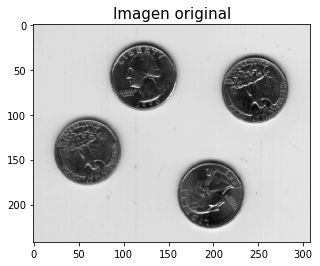

In [8]:
# Plot the image
plt.imshow(image, cmap='gray')
plt.title('Imagen original', fontsize=15)
plt.show()

# Agregando ruido Salt & Pepper a la imagen

In [9]:
# Add Salt & Pepper noise to the image
image_with_noise = util.random_noise(image, mode='s&p', salt_vs_pepper=0.02)

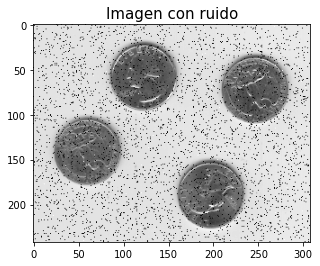

In [10]:
# Plot the image
plt.imshow(image_with_noise, cmap='gray')
plt.title('Imagen con ruido', fontsize=15)
plt.show()

# Filtro pasabajos

In [11]:
# Create the kernel for the low pass filter and normalize it
kernel = np.ones((3, 3), dtype=np.float32)
kernel /= kernel.sum()

# Apply the filter
image_with_lowpass = cv2.filter2D(src=image_with_noise, ddepth=-1, kernel=kernel)

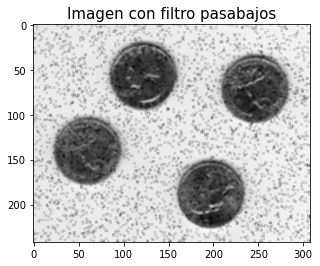

In [12]:
# Plot the image
plt.imshow(image_with_lowpass, cmap='gray')
plt.title('Imagen con filtro pasabajos', fontsize=15)
plt.show()

# Filtro mediana

In [13]:
# Create the footprint to be used when filtering, particularly using a 3x3 kernel
# to pick the pixel and its neighbours before applying a median selection for the 
# non linear filter. Apply the median filter.
image_with_median = filters.median(image_with_noise, morphology.rectangle(3, 3))

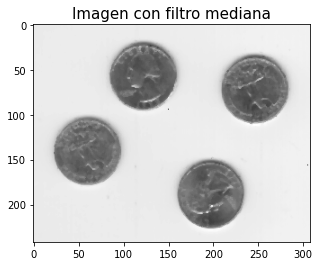

In [14]:
# Plot the image
plt.imshow(image_with_median, cmap='gray')
plt.title('Imagen con filtro mediana', fontsize=15)
plt.show()

# Comparación y análisis

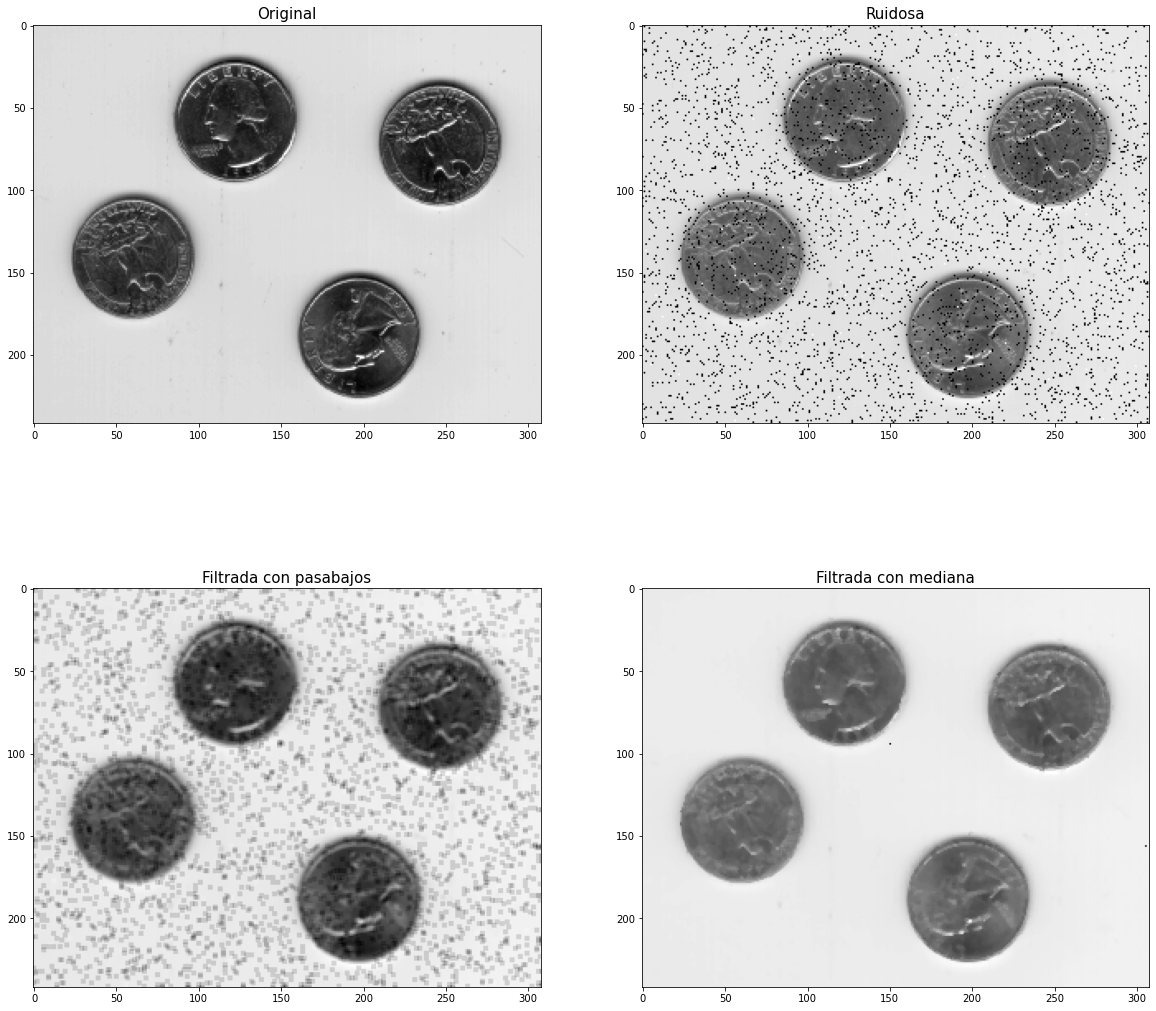

In [16]:
# Create the subplots to layout the images
fig, ax = plt.subplots(2, 2, figsize=(20, 19))
ax = ax.flatten()

# Plot the original image
ax[0].set_title('Original', fontsize=15)
ax[0].imshow(image, cmap='gray')

# Plot the noisy image
ax[1].set_title('Ruidosa', fontsize=15)
ax[1].imshow(image_with_noise, cmap='gray')

# Plot the low pass filtered image
ax[2].set_title('Filtrada con pasabajos', fontsize=15)
ax[2].imshow(image_with_lowpass, cmap='gray')

# Plot the median filtered image
ax[3].set_title('Filtrada con mediana', fontsize=15)
ax[3].imshow(image_with_median, cmap='gray')

# Show the plot
plt.show()

El ruido **salt & pepper** consiste en la aparición aleatoria de píxeles negros y blancos. Estos píxeles suelen aparecer producto de errores en la comunicación del contenido de la imagen. Los píxeles negros y blancos que agrega el ruido están en los extremos de los niveles de grises, por eso cuando se utiliza un filtro pasabajos para promediar una región, la presencia de estos extremos tiene mucho peso en el resultado, provocando que no logre removerse correctamente la presencia del ruido. Por otro lado, si se utiliza un filtro no lineal que reemplace los píxeles por la mediana entre los observados por la máscara, resultará que el ruido **salt & pepper** se encuentra apartado de la distribución de grises local, por tanto seleccionar la mediana será una forma eficiente de eliminar el ruido.